# Cluster Analysis

This notebook provides a comprehensive analysis of the clusters identified through K-Means clustering.

## Objectives:
1. Statistical summary of each cluster
2. Feature distributions across clusters
3. Cluster characterization and interpretation
4. Identification of key differentiating features
5. Conclusions about cluster properties

## 1. Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.stats import gaussian_kde


In [3]:
# Load the clustered data
df = pd.read_csv('data/clustered_welddb.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nCluster column used: 'best_cluster' (K-Means with 6 clusters)")
print(f"\nCluster distribution:")
print(df['best_cluster'].value_counts().sort_index())

# Store cluster labels
cluster_labels = df['best_cluster']

Dataset shape: (1652, 58)

Cluster column used: 'best_cluster' (K-Means with 6 clusters)

Cluster distribution:
best_cluster
0    649
1    168
2    146
3    343
4    101
5    245
Name: count, dtype: int64


## 2. Define Feature Groups

In [4]:
# Group features by category for easier analysis
chemical_features = [
    'carbon_wt_pct', 'silicon_wt_pct', 'manganese_wt_pct', 
    'sulphur_wt_pct', 'phosphorus_wt_pct', 'vanadium_wt_pct',
    'oxygen_ppm', 'titanium_ppm', 'nitrogen_ppm', 'aluminium_ppm'
]

welding_features = [
    'current_a', 'voltage_v', 'heat_input_kj_per_mm', 
    'interpass_temp_c', 'pwht_temp_c', 'pwht_time_h'
]

mechanical_features = [
    'charpy_temp_c', 'charpy_toughness_j'
]

engineered_features = [
    'impurities_index', 'sulphur_phosphorus_ratio', 'power_input_kw',
    'power_efficiency', 'current_density_proxy', 'hardenability_index',
    'carbon_manganese_ratio', 'cooling_rate_proxy', 'thermal_cycle_intensity'
]

# All numeric features for analysis
all_analysis_features = (chemical_features + welding_features + 
                         mechanical_features + engineered_features)

print(f"Total features for analysis: {len(all_analysis_features)}")
print(f"  - Chemical composition: {len(chemical_features)}")
print(f"  - Welding parameters: {len(welding_features)}")
print(f"  - Mechanical properties: {len(mechanical_features)}")
print(f"  - Engineered features: {len(engineered_features)}")

Total features for analysis: 27
  - Chemical composition: 10
  - Welding parameters: 6
  - Mechanical properties: 2
  - Engineered features: 9


## 3. Cluster Size and Density Overview

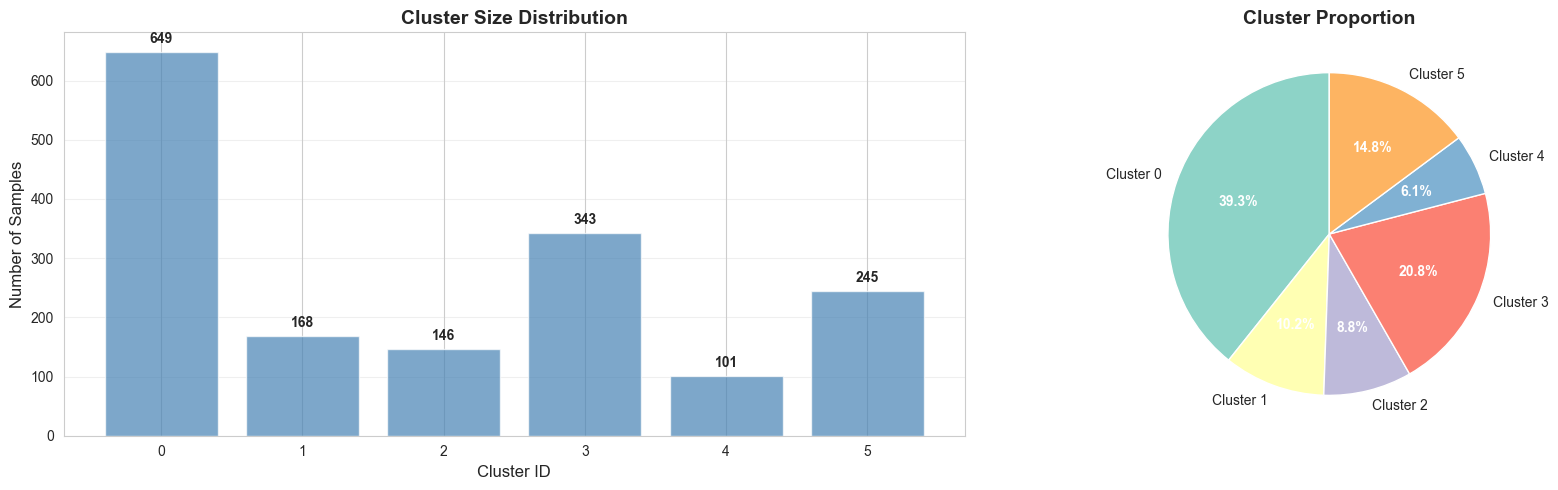


CLUSTER OVERVIEW
Cluster 0:  649 samples ( 39.3%)
Cluster 1:  168 samples ( 10.2%)
Cluster 2:  146 samples (  8.8%)
Cluster 3:  343 samples ( 20.8%)
Cluster 4:  101 samples (  6.1%)
Cluster 5:  245 samples ( 14.8%)


In [18]:
# Create overview of clusters
n_clusters = df['best_cluster'].nunique()

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Plot 1: Cluster sizes
cluster_counts = df['best_cluster'].value_counts().sort_index()
axes[0].bar(cluster_counts.index, cluster_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Cluster Size Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(cluster_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 2: Cluster percentage
cluster_pct = (cluster_counts / len(df) * 100)
colors = plt.cm.Set3(range(n_clusters))
wedges, texts, autotexts = axes[1].pie(cluster_pct.values, labels=[f'Cluster {i}' for i in cluster_pct.index],
                                         autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Cluster Proportion', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')


plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CLUSTER OVERVIEW")
print("="*80)
for cluster_id in sorted(df['best_cluster'].unique()):
    count = cluster_counts[cluster_id]
    pct = cluster_pct[cluster_id]
    print(f"Cluster {cluster_id}: {count:4d} samples ({pct:5.1f}%)")

## 4. Statistical Summary by Cluster

In [6]:
# Compute statistical summary for each cluster
print("\n" + "="*80)
print("STATISTICAL SUMMARY BY CLUSTER")
print("="*80)

for cluster_id in sorted(df['best_cluster'].unique()):
    cluster_data = df[df['best_cluster'] == cluster_id][all_analysis_features]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} - {len(cluster_data)} samples")
    print(f"{'='*80}")
    
    # Show summary statistics
    summary = cluster_data.describe().loc[['mean', 'std', 'min', 'max']].T
    summary = summary.round(3)
    
    # Show only the first few features to avoid overwhelming output
    print("\n--- Chemical Composition ---")
    print(summary.loc[chemical_features].to_string())
    
    print("\n--- Welding Parameters ---")
    print(summary.loc[welding_features].to_string())
    
    print("\n--- Mechanical Properties ---")
    print(summary.loc[mechanical_features].to_string())


STATISTICAL SUMMARY BY CLUSTER

CLUSTER 0 - 649 samples

--- Chemical Composition ---
                      mean     std      min      max
carbon_wt_pct        0.072   0.019    0.029    0.147
silicon_wt_pct       0.349   0.076    0.220    0.580
manganese_wt_pct     1.491   0.219    1.000    2.250
sulphur_wt_pct       0.006   0.002    0.001    0.011
phosphorus_wt_pct    0.009   0.003    0.002    0.017
vanadium_wt_pct      0.010   0.026    0.000    0.250
oxygen_ppm         404.238  48.912  262.000  500.000
titanium_ppm        66.662  58.702    1.000  260.000
nitrogen_ppm        84.104  27.646   38.000  253.000
aluminium_ppm       62.466  75.788    1.000  340.000

--- Welding Parameters ---
                         mean      std    min    max
current_a             171.310    4.273  115.0  190.0
voltage_v              21.451    1.685   21.0   34.0
heat_input_kj_per_mm    1.002    0.071    0.6    2.2
interpass_temp_c      204.884   19.358  150.0  300.0
pwht_temp_c           199.291  226.28

## 5. Feature Comparison Across Clusters

### 5.1 Chemical Composition

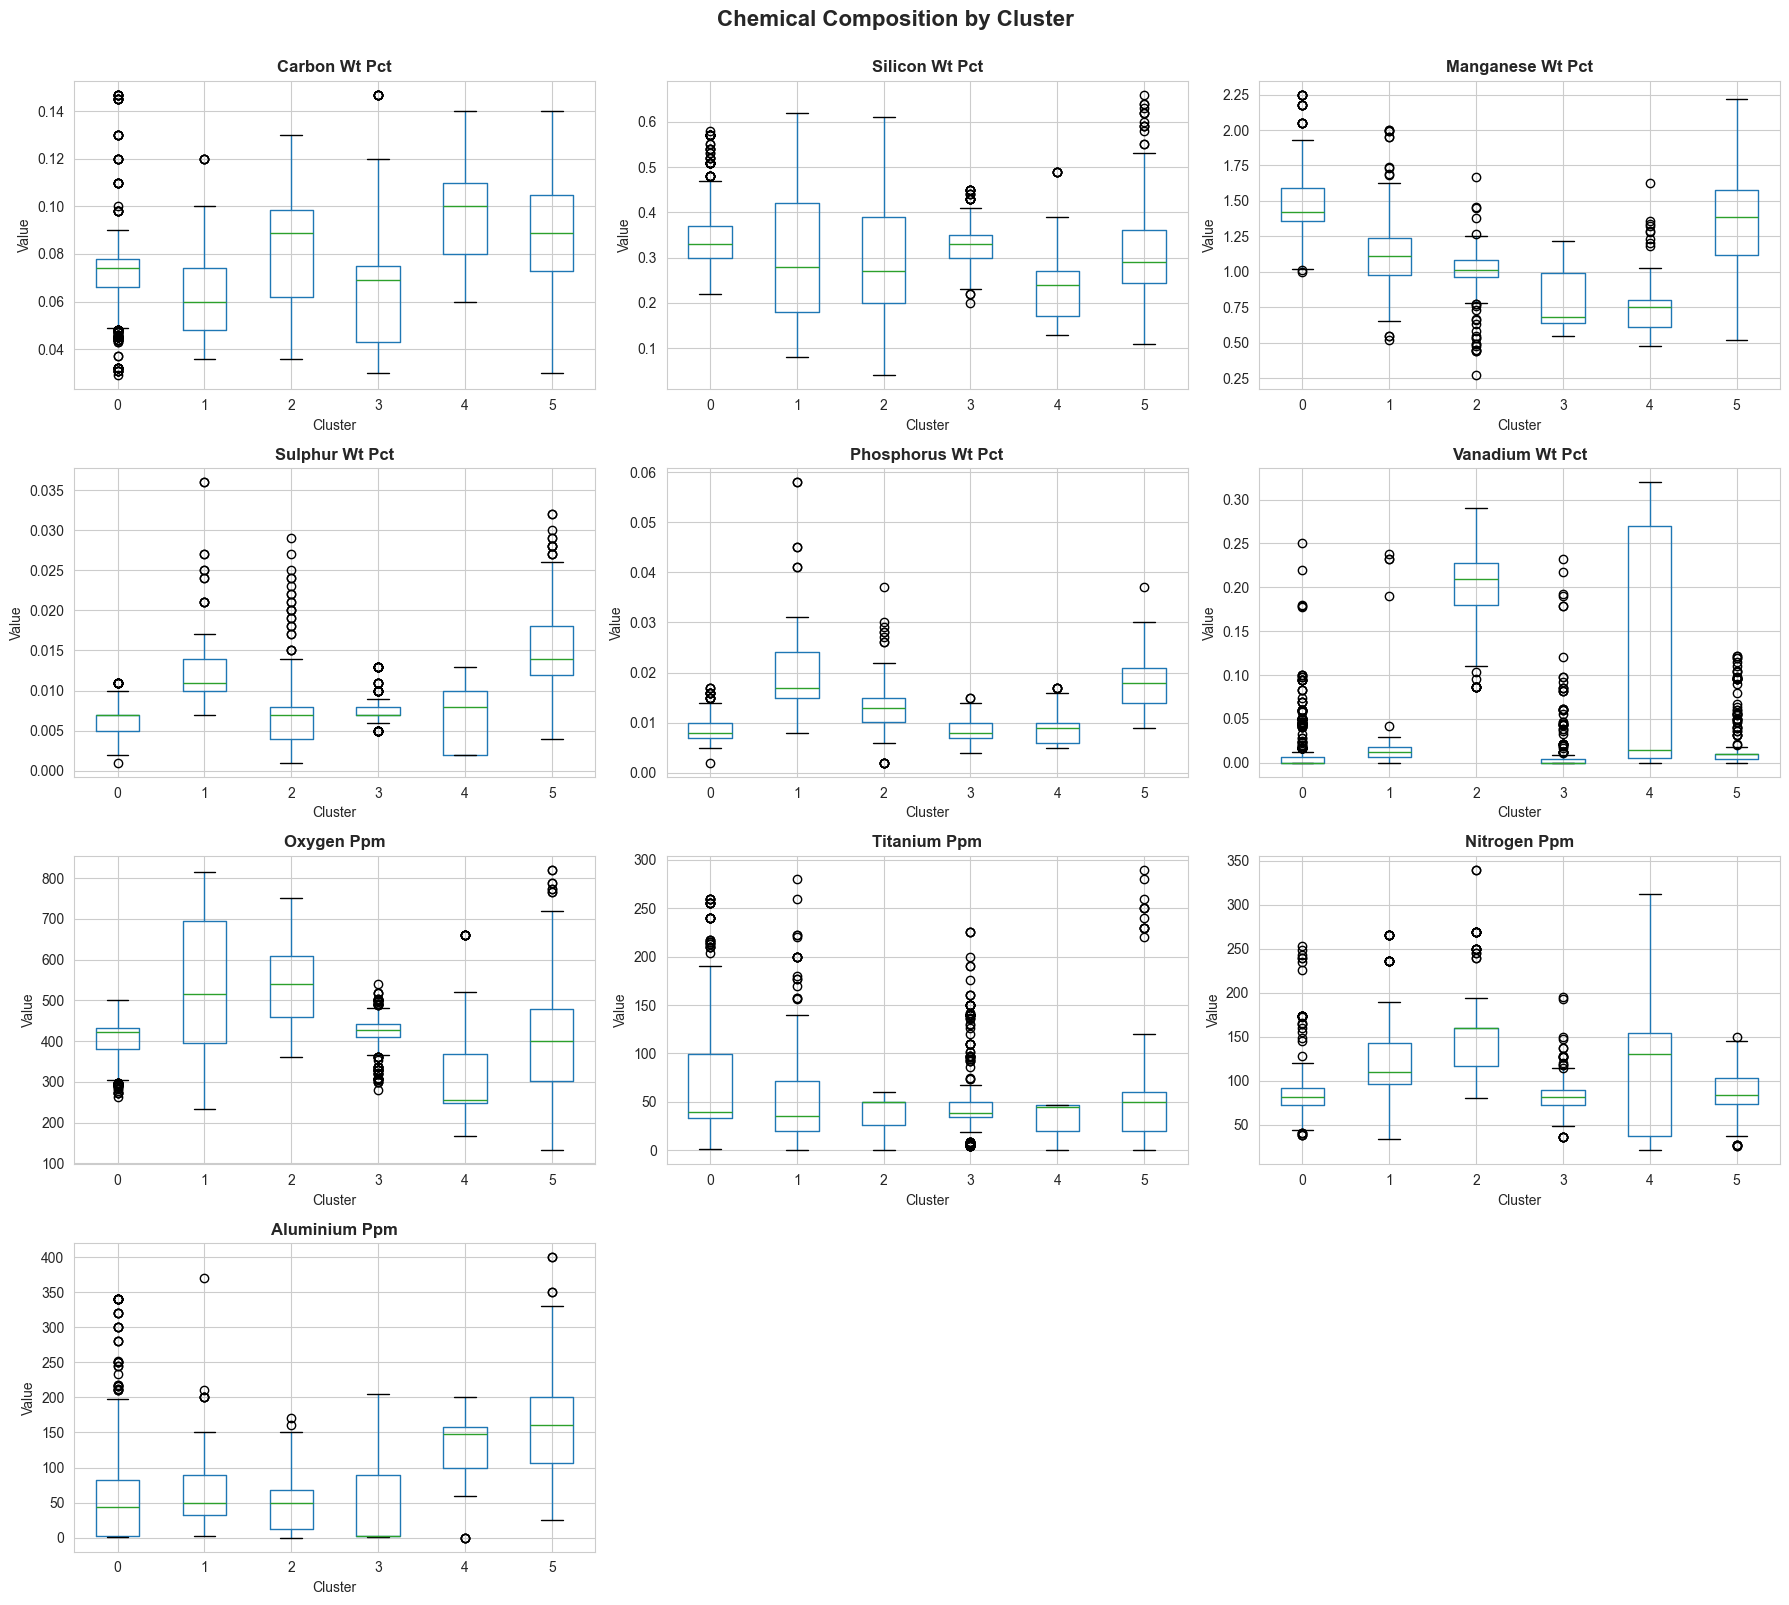

In [ ]:
# Create box plots for chemical features
n_features = len(chemical_features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(chemical_features):
    df.boxplot(column=feature, by='best_cluster', ax=axes[idx])
    axes[idx].set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cluster', fontsize=10)
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].get_figure().suptitle('') 

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Chemical Composition by Cluster', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 5.2 Welding Parameters

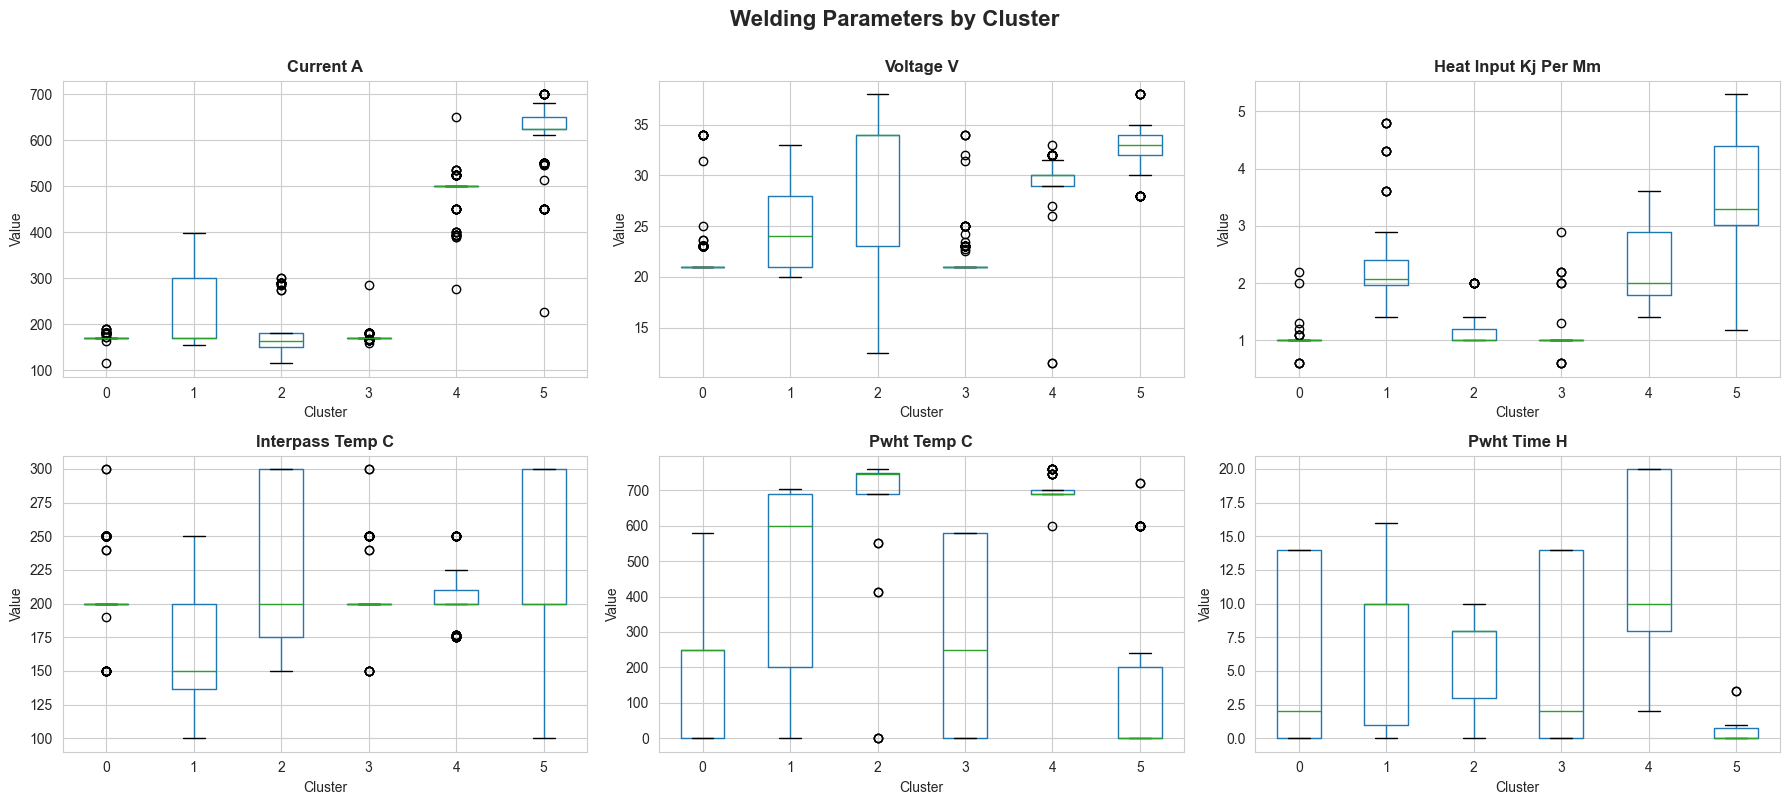

In [8]:
# Create box plots for welding parameters
n_features = len(welding_features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(welding_features):
    df.boxplot(column=feature, by='best_cluster', ax=axes[idx])
    axes[idx].set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cluster', fontsize=10)
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].get_figure().suptitle('')

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Welding Parameters by Cluster', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 5.3 Mechanical Properties (Target Variables)

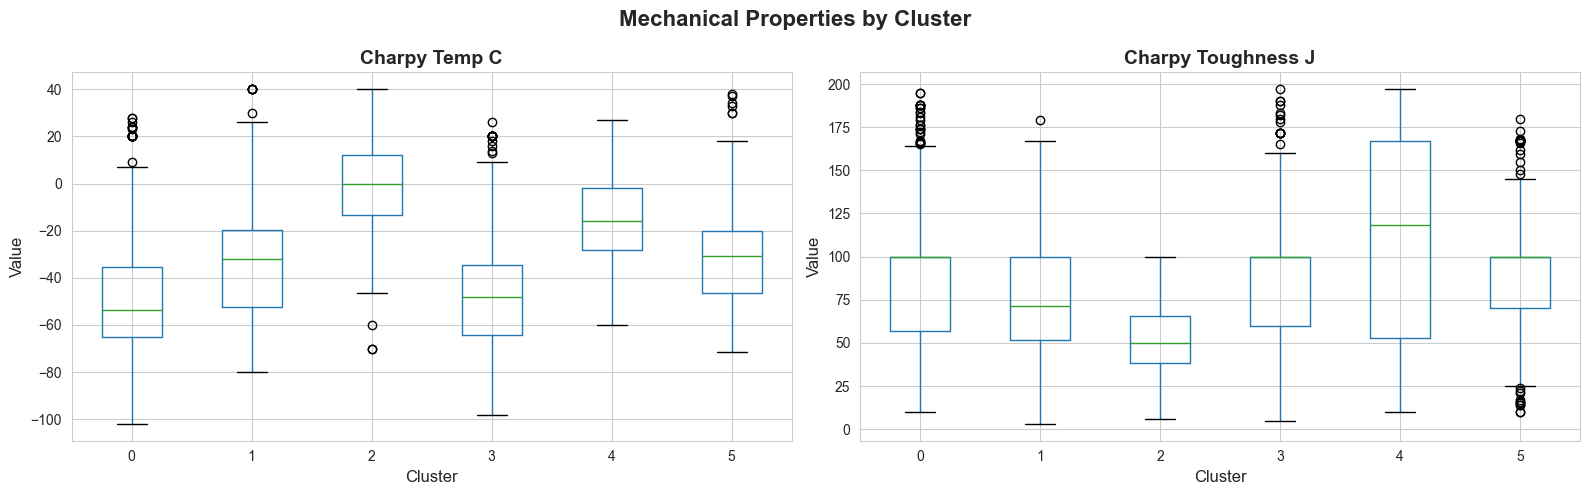


MECHANICAL PROPERTIES BY CLUSTER

CHARPY_TEMP_C:
               mean    std    min   max
best_cluster                           
0            -47.82  25.22 -102.0  28.0
1            -31.59  28.75  -80.0  40.0
2             -1.42  21.33  -70.0  40.0
3            -45.90  25.01  -98.0  26.0
4            -14.24  19.59  -60.0  27.0
5            -29.05  20.73  -71.6  38.0

CHARPY_TOUGHNESS_J:
                mean    std   min    max
best_cluster                            
0              85.37  35.85  10.0  195.0
1              72.28  38.20   3.0  179.0
2              52.16  22.98   6.0  100.0
3              85.29  35.72   5.0  197.0
4             110.61  57.81  10.0  197.0
5              89.63  36.15  10.0  180.0


In [9]:
# Focus on mechanical properties - these are often the most important
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for idx, feature in enumerate(mechanical_features):
    df.boxplot(column=feature, by='best_cluster', ax=axes[idx])
    axes[idx].set_title(feature.replace('_', ' ').title(), fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Cluster', fontsize=12)
    axes[idx].set_ylabel('Value', fontsize=12)
    axes[idx].get_figure().suptitle('')

plt.suptitle('Mechanical Properties by Cluster', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics for mechanical properties
print("\n" + "="*80)
print("MECHANICAL PROPERTIES BY CLUSTER")
print("="*80)
for feature in mechanical_features:
    print(f"\n{feature.upper()}:")
    summary = df.groupby('best_cluster')[feature].agg(['mean', 'std', 'min', 'max'])
    print(summary.round(2).to_string())

## 6. Identify Key Differentiating Features


TOP 20 FEATURES THAT DISTINGUISH CLUSTERS (ANOVA F-test)
Higher F-statistic = Better at distinguishing clusters
Lower p-value = More statistically significant

                Feature  F-statistic       p-value
              current_a  6817.179745  0.000000e+00
         power_input_kw  5398.488491  0.000000e+00
  current_density_proxy  2833.373820  0.000000e+00
   heat_input_kj_per_mm  1578.860661  0.000000e+00
     cooling_rate_proxy  1078.198087  0.000000e+00
              voltage_v   807.260824  0.000000e+00
thermal_cycle_intensity   584.933758  0.000000e+00
        vanadium_wt_pct   526.514803  0.000000e+00
       manganese_wt_pct   498.707104  0.000000e+00
       impurities_index   412.204518 4.815641e-287
    hardenability_index   383.501278 5.942285e-273
      phosphorus_wt_pct   335.792071 3.144800e-248
       power_efficiency   299.946512 1.842760e-228
            pwht_temp_c   285.332490 4.452460e-220
 carbon_manganese_ratio   280.187936 4.436201e-217
         sulphur_wt_pct

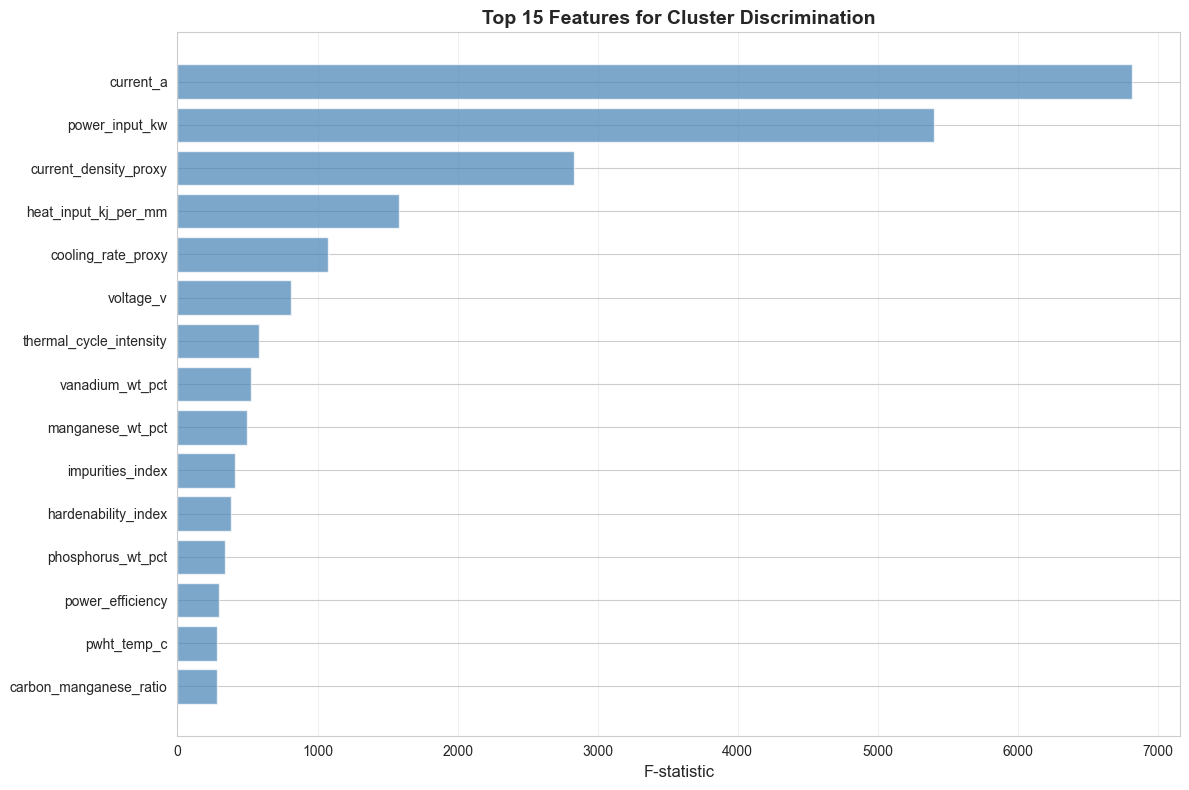

In [10]:
# Use ANOVA F-statistic to identify features that best distinguish clusters
from sklearn.feature_selection import f_classif

X = df[all_analysis_features]
y = df['best_cluster']

# Calculate F-statistics
f_stats, p_values = f_classif(X, y)

# Create dataframe with results
feature_importance = pd.DataFrame({
    'Feature': all_analysis_features,
    'F-statistic': f_stats,
    'p-value': p_values
})

feature_importance = feature_importance.sort_values('F-statistic', ascending=False)

print("\n" + "="*80)
print("TOP 20 FEATURES THAT DISTINGUISH CLUSTERS (ANOVA F-test)")
print("="*80)
print("Higher F-statistic = Better at distinguishing clusters")
print("Lower p-value = More statistically significant")
print()
print(feature_importance.head(20).to_string(index=False))

# Visualize top features
top_n = 15
top_features = feature_importance.head(top_n)

plt.figure(figsize=(12, 8))
plt.barh(range(top_n), top_features['F-statistic'].values, color='steelblue', alpha=0.7)
plt.yticks(range(top_n), top_features['Feature'].values)
plt.xlabel('F-statistic', fontsize=12)
plt.title(f'Top {top_n} Features for Cluster Discrimination', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Cluster Characterization - Mean Values Heatmap

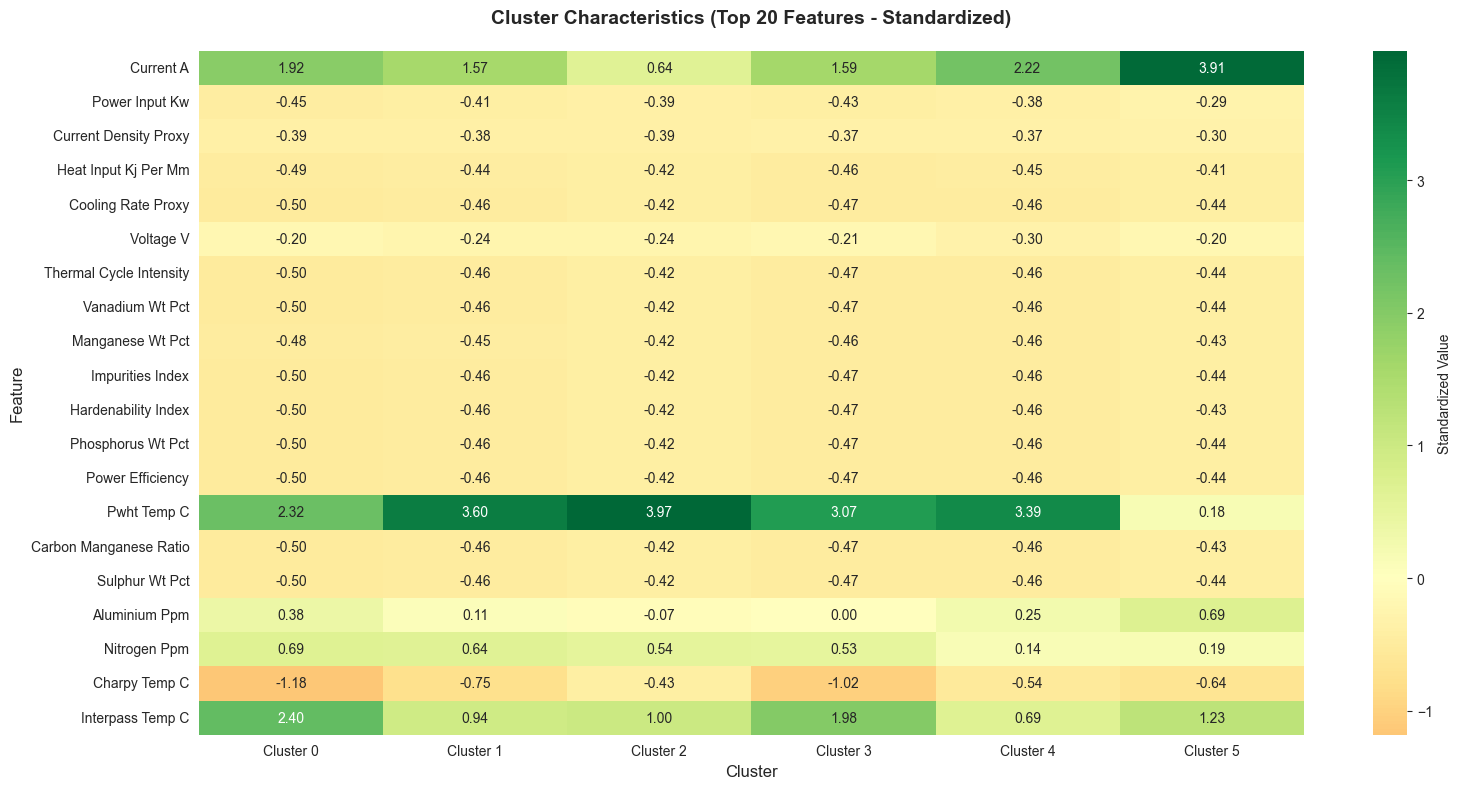


Interpretation:
  - Green: Above average for this feature
  - Red: Below average for this feature
  - Yellow: Near average


In [11]:
# Create heatmap of mean values for top features
top_features_list = feature_importance.head(20)['Feature'].tolist()

# Calculate mean values for each cluster
cluster_means = df.groupby('best_cluster')[top_features_list].mean()

# Standardize for better visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_means_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_means.T).T,
    index=cluster_means.index,
    columns=cluster_means.columns
)

# Create heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means_scaled.T, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, cbar_kws={'label': 'Standardized Value'},
            xticklabels=[f'Cluster {i}' for i in cluster_means_scaled.index],
            yticklabels=[f.replace('_', ' ').title() for f in cluster_means_scaled.columns])
plt.title('Cluster Characteristics (Top 20 Features - Standardized)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  - Green: Above average for this feature")
print("  - Red: Below average for this feature")
print("  - Yellow: Near average")

## 8. Detailed Cluster Characterization

In [12]:
# For each cluster, identify its distinctive characteristics
print("\n" + "="*80)
print("DETAILED CLUSTER CHARACTERIZATION")
print("="*80)

# Calculate z-scores for each feature within each cluster
overall_means = df[all_analysis_features].mean()
overall_stds = df[all_analysis_features].std()

for cluster_id in sorted(df['best_cluster'].unique()):
    cluster_data = df[df['best_cluster'] == cluster_id][all_analysis_features]
    cluster_mean = cluster_data.mean()
    
    # Calculate z-scores (how many std devs from overall mean)
    z_scores = (cluster_mean - overall_means) / overall_stds
    
    # Identify distinctive features (|z-score| > 0.5)
    distinctive = z_scores[abs(z_scores) > 0.5].sort_values(ascending=False)
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} ({len(cluster_data)} samples, {len(cluster_data)/len(df)*100:.1f}%)")
    print(f"{'='*80}")
    
    if len(distinctive) > 0:
        print("\nDistinctive Characteristics (|z-score| > 0.5):")
        print("(Positive = Above average, Negative = Below average)\n")
        
        for feature, z_score in distinctive.items():
            direction = "HIGHER" if z_score > 0 else "LOWER"
            value = cluster_mean[feature]
            overall_value = overall_means[feature]
            
            print(f"  {feature:30s}: {direction:6s} (z={z_score:+.2f})")
            print(f"  {'':30s}  Cluster mean: {value:.4f}, Overall mean: {overall_value:.4f}")
    else:
        print("\nNo strongly distinctive characteristics (close to average on all features)")
    
    # Show mechanical properties for this cluster
    print("\nMechanical Properties:")
    for prop in mechanical_features:
        print(f"  {prop:30s}: {cluster_mean[prop]:.2f} (overall: {overall_means[prop]:.2f})")


DETAILED CLUSTER CHARACTERIZATION

CLUSTER 0 (649 samples, 39.3%)

Distinctive Characteristics (|z-score| > 0.5):
(Positive = Above average, Negative = Below average)

  manganese_wt_pct              : HIGHER (z=+0.75)
                                  Cluster mean: 1.4910, Overall mean: 1.2028
  hardenability_index           : HIGHER (z=+0.65)
                                  Cluster mean: 0.3207, Overall mean: 0.2753
  impurities_index              : LOWER  (z=-0.52)
                                  Cluster mean: 0.0151, Overall mean: 0.0201
  current_a                     : LOWER  (z=-0.54)
                                  Cluster mean: 171.3097, Overall mean: 262.3142
  thermal_cycle_intensity       : LOWER  (z=-0.54)
                                  Cluster mean: 0.0049, Overall mean: 0.0082
  power_input_kw                : LOWER  (z=-0.56)
                                  Cluster mean: 3.6784, Overall mean: 7.1404
  cooling_rate_proxy            : LOWER  (z=-0.58)
        

## 9. Cluster Quality Metrics


CLUSTER QUALITY METRICS

Within-Cluster Standard Deviation (lower = more homogeneous)

Average Std Dev across top 10 features:
  Cluster 0: 0.7010 - Very homogeneous
  Cluster 3: 0.9715 - Very homogeneous
  Cluster 4: 5.7086 - Less homogeneous
  Cluster 2: 5.8112 - Less homogeneous
  Cluster 5: 6.9975 - Less homogeneous
  Cluster 1: 7.2842 - Less homogeneous


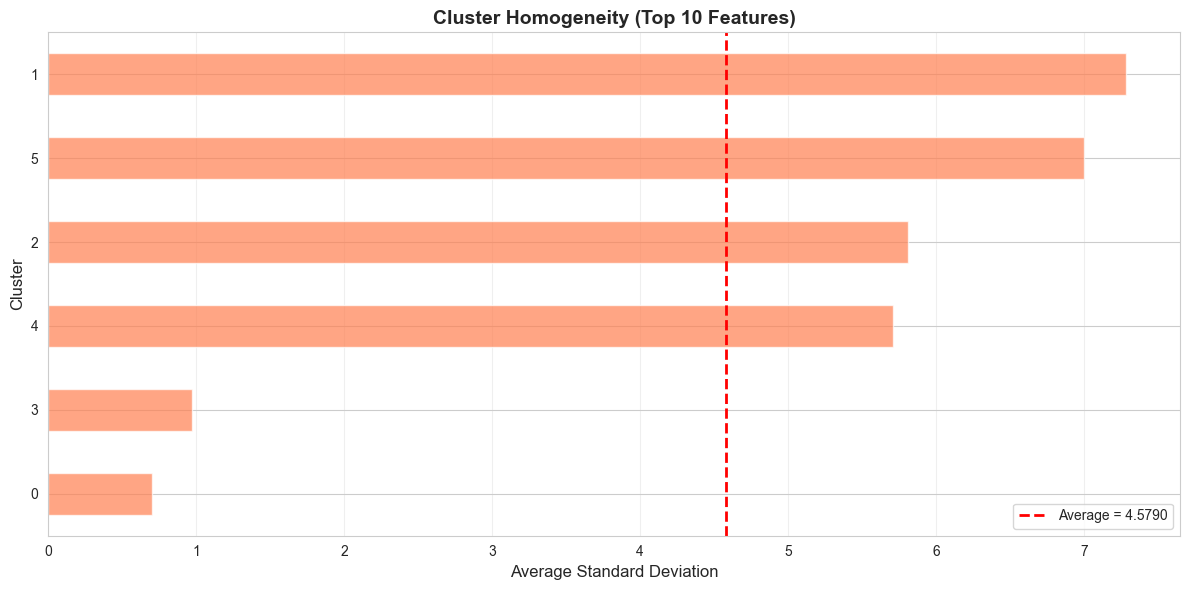

In [19]:
# Calculate within-cluster variance for key features
print("\n" + "="*80)
print("CLUSTER QUALITY METRICS")
print("="*80)

# Focus on top discriminating features
key_features = feature_importance.head(10)['Feature'].tolist()

print("\nWithin-Cluster Standard Deviation (lower = more homogeneous)\n")

cluster_std = df.groupby('best_cluster')[key_features].std()
cluster_std_avg = cluster_std.mean(axis=1)

print("Average Std Dev across top 10 features:")
for cluster_id in cluster_std_avg.sort_values().index:
    quality = "Very homogeneous" if cluster_std_avg[cluster_id] < cluster_std_avg.mean() else "Less homogeneous"
    print(f"  Cluster {cluster_id}: {cluster_std_avg[cluster_id]:.4f} - {quality}")

# Visualize
plt.figure(figsize=(12, 6))
cluster_std_avg.sort_values().plot(kind='barh', color='coral', alpha=0.7)
plt.axvline(cluster_std_avg.mean(), color='red', linestyle='--', 
            label=f'Average = {cluster_std_avg.mean():.4f}', linewidth=2)
plt.xlabel('Average Standard Deviation', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.title('Cluster Homogeneity (Top 10 Features)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Pairwise Cluster Comparison

In [15]:
# Compare pairs of clusters to understand differences
from scipy.stats import ttest_ind

print("\n" + "="*80)
print("PAIRWISE CLUSTER COMPARISONS")
print("="*80)
print("Comparing clusters based on top discriminating features")

# Use top 5 features for comparison
top_5_features = feature_importance.head(5)['Feature'].tolist()

n_clusters = df['best_cluster'].nunique()
cluster_ids = sorted(df['best_cluster'].unique())

for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        cluster_i = cluster_ids[i]
        cluster_j = cluster_ids[j]
        
        print(f"\n{'='*80}")
        print(f"Cluster {cluster_i} vs Cluster {cluster_j}")
        print(f"{'='*80}")
        
        data_i = df[df['best_cluster'] == cluster_i]
        data_j = df[df['best_cluster'] == cluster_j]
        
        print(f"Sample sizes: Cluster {cluster_i} (n={len(data_i)}), Cluster {cluster_j} (n={len(data_j)})\n")
        
        # Perform t-tests on top features
        significant_diffs = []
        
        for feature in top_5_features:
            t_stat, p_value = ttest_ind(data_i[feature], data_j[feature])
            mean_i = data_i[feature].mean()
            mean_j = data_j[feature].mean()
            
            if p_value < 0.05:  # Significant difference
                direction = "higher" if mean_i > mean_j else "lower"
                percent_diff = abs((mean_i - mean_j) / mean_j * 100)
                significant_diffs.append(
                    f"  {feature}: Cluster {cluster_i} is {direction} ({mean_i:.4f} vs {mean_j:.4f}, "
                    f"{percent_diff:.1f}% diff, p={p_value:.4f})"
                )
        
        if significant_diffs:
            print("Significant differences (p < 0.05):")
            for diff in significant_diffs:
                print(diff)
        else:
            print("No significant differences found in top 5 features.")


PAIRWISE CLUSTER COMPARISONS
Comparing clusters based on top discriminating features

Cluster 0 vs Cluster 1
Sample sizes: Cluster 0 (n=649), Cluster 1 (n=168)

Significant differences (p < 0.05):
  current_a: Cluster 0 is lower (171.3097 vs 227.8679, 24.8% diff, p=0.0000)
  power_input_kw: Cluster 0 is lower (3.6784 vs 5.8492, 37.1% diff, p=0.0000)
  current_density_proxy: Cluster 0 is lower (8.0137 vs 9.1021, 12.0% diff, p=0.0000)
  heat_input_kj_per_mm: Cluster 0 is lower (1.0023 vs 2.2783, 56.0% diff, p=0.0000)
  cooling_rate_proxy: Cluster 0 is lower (0.0021 vs 0.0053, 60.5% diff, p=0.0000)

Cluster 0 vs Cluster 2
Sample sizes: Cluster 0 (n=649), Cluster 2 (n=146)

Significant differences (p < 0.05):
  power_input_kw: Cluster 0 is lower (3.6784 vs 5.1839, 29.0% diff, p=0.0000)
  current_density_proxy: Cluster 0 is higher (8.0137 vs 5.9907, 33.8% diff, p=0.0000)
  heat_input_kj_per_mm: Cluster 0 is lower (1.0023 vs 1.1411, 12.2% diff, p=0.0000)
  cooling_rate_proxy: Cluster 0 is l

## 11. Summary and Conclusions

In [20]:
# Generate summary report
print("\n" + "="*80)
print("CLUSTER ANALYSIS SUMMARY")
print("="*80)

print(f"\nTotal samples: {len(df)}")
print(f"Number of clusters: {n_clusters}")
print(f"\nCluster sizes and characteristics:\n")

for cluster_id in sorted(df['best_cluster'].unique()):
    cluster_data = df[df['best_cluster'] == cluster_id]
    count = len(cluster_data)
    pct = count / len(df) * 100
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {count} samples ({pct:.1f}%)")
    
    # Get most distinctive features
    cluster_mean = cluster_data[all_analysis_features].mean()
    z_scores = (cluster_mean - overall_means) / overall_stds
    top_distinctive = z_scores[abs(z_scores) > 0.75].sort_values(ascending=False)
    
    if len(top_distinctive) > 0:
        print(f"  Key characteristics:")
        for feature, z_score in list(top_distinctive.items())[:3]:
            direction = "HIGH" if z_score > 0 else "LOW"
            print(f"    - {direction} {feature} (z={z_score:+.2f})")
    
    # Mechanical properties
    avg_toughness = cluster_data['charpy_toughness_j'].mean()
    avg_temp = cluster_data['charpy_temp_c'].mean()
    print(f"  Avg Charpy toughness: {avg_toughness:.1f} J")
    print(f"  Avg Charpy temp: {avg_temp:.1f} °C")

print("\n" + "="*80)
print("Analysis complete!")
print("="*80)


CLUSTER ANALYSIS SUMMARY

Total samples: 1652
Number of clusters: 6

Cluster sizes and characteristics:


Cluster 0:
  Size: 649 samples (39.3%)
  Key characteristics:
    - HIGH manganese_wt_pct (z=+0.75)
  Avg Charpy toughness: 85.4 J
  Avg Charpy temp: -47.8 °C

Cluster 1:
  Size: 168 samples (10.2%)
  Key characteristics:
    - HIGH power_efficiency (z=+1.72)
    - HIGH phosphorus_wt_pct (z=+1.24)
    - HIGH thermal_cycle_intensity (z=+1.16)
  Avg Charpy toughness: 72.3 J
  Avg Charpy temp: -31.6 °C

Cluster 2:
  Size: 146 samples (8.8%)
  Key characteristics:
    - HIGH vanadium_wt_pct (z=+2.24)
    - HIGH pwht_temp_c (z=+1.42)
    - HIGH nitrogen_ppm (z=+1.37)
  Avg Charpy toughness: 52.2 J
  Avg Charpy temp: -1.4 °C

Cluster 3:
  Size: 343 samples (20.8%)
  Key characteristics:
    - LOW manganese_wt_pct (z=-1.08)
    - LOW hardenability_index (z=-1.14)
  Avg Charpy toughness: 85.3 J
  Avg Charpy temp: -45.9 °C

Cluster 4:
  Size: 101 samples (6.1%)
  Key characteristics:
    -

## 13. Save Results

In [21]:
# Save cluster summary statistics
cluster_summary = df.groupby('best_cluster')[all_analysis_features].agg(['mean', 'std'])
cluster_summary.to_csv('data/cluster_summary_statistics.csv')

print("Cluster summary statistics saved to 'data/cluster_summary_statistics.csv'")

# Save feature importance rankings
feature_importance.to_csv('data/cluster_feature_importance.csv', index=False)

print("Feature importance rankings saved to 'data/cluster_feature_importance.csv'")

print("\nAll analysis results saved successfully!")

Cluster summary statistics saved to 'data/cluster_summary_statistics.csv'
Feature importance rankings saved to 'data/cluster_feature_importance.csv'

All analysis results saved successfully!
